In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

No joblib
no cmocean


In [2]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

tracername = 'LIM'
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

save_path = '/home/hbkoziel/pyfesom/figures/Arc12/FINAL2/'
data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [3]:
dates = pd.date_range('1985', freq="M", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = dates
#data.time.data = dates

In [4]:
data

<xarray.Dataset>
Dimensions:            (nod2d: 753179, time: 372)
Coordinates:
  * time               (time) datetime64[ns] 1985-01-31 ... 2015-12-31
Dimensions without coordinates: nod2d
Data variables:
    Felimphy           (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Felimdia           (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Nlimphy            (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Nlimdia            (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Silim              (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Phy_Light_limiter  (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Dia_Light_limiter  (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(12, 753179)>
    Phy_Lim            (time, nod2d) float64 dask.array<shape=(372, 753179), chunksize=(

In [5]:
data2 = data.sel(time=data.time.dt.month.isin([7, 8, 9]))
data2 = data2.compute()

data2 = data2.resample(time='YS').mean(dim='time')
data2 = data2.compute()
data2

<xarray.Dataset>
Dimensions:            (nod2d: 753179, time: 31)
Coordinates:
  * time               (time) datetime64[ns] 1985-01-01 ... 2015-01-01
Dimensions without coordinates: nod2d
Data variables:
    Felimphy           (time, nod2d) float64 0.862 0.8555 ... 0.934 0.9376
    Felimdia           (time, nod2d) float64 0.5102 0.4969 ... 0.7023 0.7148
    Nlimphy            (time, nod2d) float64 0.982 0.9819 ... 0.9829 0.983
    Nlimdia            (time, nod2d) float64 0.9677 0.9676 ... 0.9693 0.9696
    Silim              (time, nod2d) float64 0.9445 0.9441 ... 0.934 0.9349
    Phy_Light_limiter  (time, nod2d) float64 6.708e-05 8.094e-05 ... 0.000141
    Dia_Light_limiter  (time, nod2d) float64 8.748e-05 9.32e-05 ... 1.58e-05
    Phy_Lim            (time, nod2d) float64 0.0 0.0 0.0 0.0 ... 2.0 0.0 0.0 0.0
    Dia_Lim            (time, nod2d) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [6]:
# data2['Nlimphy'].plot()

In [7]:
data_np = data2.Nlimphy.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_np = data_np.compute()

data_nd = data2.Nlimdia.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_nd = data_nd.compute()

data_fp = data2.Felimphy.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_fp = data_nd.compute()

data_fd = data2.Felimdia.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_fd = data_nd.compute()

data_si = data2.Silim.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_si = data_si.compute()

data_lp = data2.Phy_Light_limiter.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_lp = data_lp.compute()

data_ld = data2.Dia_Light_limiter.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_ld = data_ld.compute()

In [8]:
print np.shape(data_np)

(31, 753179)


In [9]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [10]:
factor = .4#.35

In [11]:
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016,1)))
ind_bio = np.load('index_eurasian.npy')
df2 = pd.DataFrame()
df3 = pd.DataFrame()

area_bio_light = np.zeros(len(data_np.time))
area_bio_nut = np.zeros(len(data_np.time))

area_bio_light_2 = np.zeros(len(data_np.time))
area_bio_nut_2 = np.zeros(len(data_np.time))

for i in range(0,len(data_np.time)):
    
    ind_light = np.where((data_np[i,:] >factor) & (data_nd[i,:] >factor) & (data_si[i,:]> factor) & (data_lp[i,:] <= factor) & (data_ld[i,:] <= factor))
    ind_light = np.intersect1d(ind_light,ind_bio)
    ind_nut = np.where((data_np[i,:] <= factor) | (data_nd[i,:] <= factor) | (data_si[i,:] <= factor))
    ind_nut = np.intersect1d(ind_nut,ind_bio)

    area_bio_nut[i] = np.sum(NodalAreaModel[ind_nut])
    area_bio_light[i] = np.sum(NodalAreaModel[ind_light])
    
#     # Most limiting factors found for nano
#     lim=np.column_stack((data_fp[i,:],data_np[i,:],data_lp[i,:]))
#     limphy=lim.argmin(axis=1)

#     # Most limiting factors found for dia
#     lim=np.column_stack((data_fd[i,:],data_nd[i,:],data_si[i,:],data_lp[i,:]))
#     limdia=lim.argmin(axis=1)
    
#     ind_nut_dia = np.where((limdia == 0) | (limdia == 1) | (limdia ==2))
#     ind_light_dia = np.where((limdia == 3))
#     ind_nut_phy = np.where((limdia == 0) | (limdia == 1))
#     ind_light_phy = np.where((limdia == 2))
    
#     ind_nut_2 = np.unique(np.concatenate((ind_nut_dia,ind_nut_phy),1))
#     ind_light_2 = np.unique(np.concatenate((ind_light_dia,ind_light_phy),1))
#     area_bio_nut_2[i] = np.sum(NodalAreaModel[ind_nut_2])
#     area_bio_light_2[i] = np.sum(NodalAreaModel[ind_light_2])
    
    
df2 = pd.DataFrame()
df2['time'] = dates
df2.set_index('time', inplace= True)

df2['light'] = area_bio_light
df2['nutrient'] = area_bio_nut

df3_yearly_em = df2.resample('Y').sum()

In [12]:
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016,1)))
ind_bio = np.load('index_amerasian.npy')
df2 = pd.DataFrame()
df3 = pd.DataFrame()

area_bio_light = np.zeros(len(data_np.time))
area_bio_nut = np.zeros(len(data_np.time))

for i in range(0,len(data_np.time)):

    ind_light = np.where((data_np[i,:] > factor) & (data_nd[i,:] > factor) & (data_si[i,:] > factor) & (data_lp[i,:] <= factor) & (data_ld[i,:] <= factor))
    ind_light = np.intersect1d(ind_light,ind_bio)
    ind_nut = np.where((data_np[i,:] <= factor) | (data_nd[i,:] <= factor) | (data_si[i,:]<= factor))
    ind_nut = np.intersect1d(ind_nut,ind_bio)
    
    area_bio_nut[i] = np.sum(NodalAreaModel[ind_nut])
    area_bio_light[i] = np.sum(NodalAreaModel[ind_light])
    
df2 = pd.DataFrame()
df2['time'] = dates
df2.set_index('time', inplace= True)
df2['light'] = area_bio_light
df2['nutrient'] = area_bio_nut

df3_yearly_am = df2.resample('Y').sum()

In [13]:
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016,1)))
ind_bio = np.load('index_slope.npy')
df2 = pd.DataFrame()
df3 = pd.DataFrame()

area_bio_light = np.zeros(len(data_np.time))
area_bio_nut = np.zeros(len(data_np.time))

for i in range(0,len(data_np.time)):

    ind_light = np.where((data_np[i,:] > factor) & (data_nd[i,:] > factor) & (data_si[i,:] > factor) & (data_lp[i,:] <= factor) & (data_ld[i,:] <= factor))
    ind_light = np.intersect1d(ind_light,ind_bio)
    ind_nut = np.where((data_np[i,:] <= factor) | (data_nd[i,:] <= factor) | (data_si[i,:]<= factor))
    ind_nut = np.intersect1d(ind_nut,ind_bio)
    
    area_bio_nut[i] = np.sum(NodalAreaModel[ind_nut])
    area_bio_light[i] = np.sum(NodalAreaModel[ind_light])
    
df2 = pd.DataFrame()
df2['time'] = dates
df2.set_index('time', inplace= True)
df2['light'] = area_bio_light
df2['nutrient'] = area_bio_nut

df3_yearly_sl = df2.resample('Y').sum()

# Description

The area below represent the sum of monthly maps representing areas limited or co-limited by either nutrients (DIN and/or DSi) or light

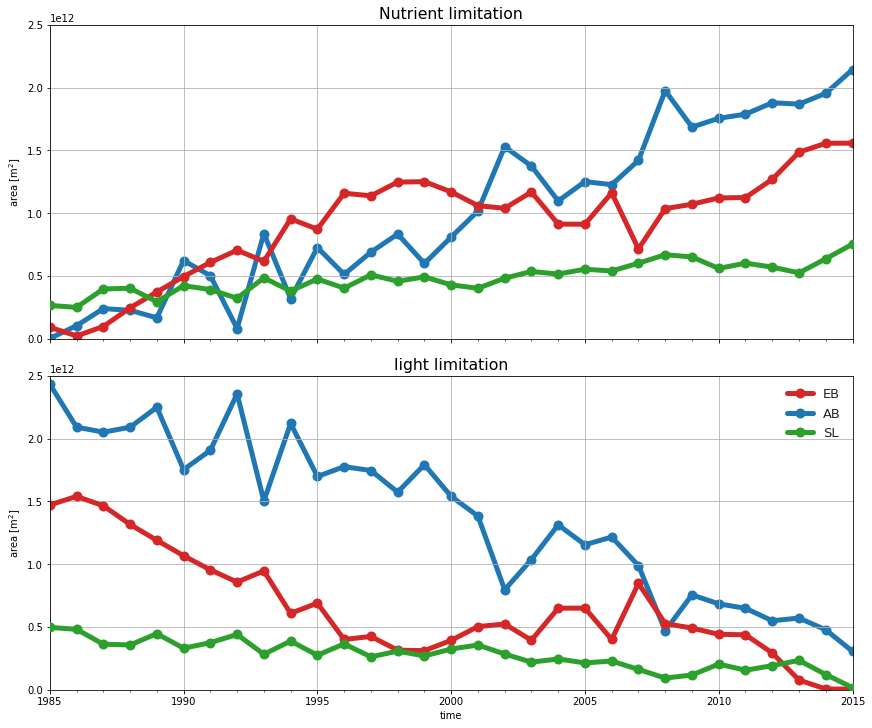

In [14]:
figsize = (12, 10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=True, sharex=True)

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

df3_yearly_em['nutrient'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax1, legend = False, color = 'tab:red', zorder = 2)
df3_yearly_am['nutrient'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax1, legend = False, color = 'tab:blue', zorder = 1)
df3_yearly_sl['nutrient'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax1, legend = False, color = 'tab:green', zorder = 3)
ax1.set_ylabel('area [m$^{2}$]')
ax1.set_title('Nutrient limitation')
ax1.set_ylim(0,2.5e12)

df3_yearly_em['light'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2, legend = False, color = 'tab:red', zorder = 2, label = 'EB')
df3_yearly_am['light'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2, legend = False, color = 'tab:blue', zorder = 1, label = 'AB')
df3_yearly_sl['light'].plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2, legend = False, color = 'tab:green', zorder = 3, label = 'SL')

ax2.set_ylabel('area [m$^{2}$]')
ax2.set_title('light limitation')
ax2.set_ylim(0,2.5e12)

plt.legend()

plt.savefig(save_path+'FIG3.png', dpi = 300, bbox_inches='tight') 
plt.savefig(save_path+'FIG3.pdf', dpi = 300, bbox_inches='tight') 

In [15]:
# df3_yearly_em.to_csv('limiting_factors_eurasian.csv')
# df3_yearly_am.to_csv('limiting_factors_amerasian.csv')

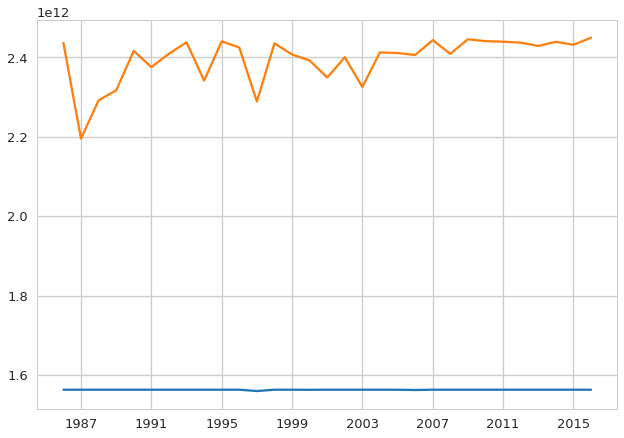

In [16]:
plt.plot(df3_yearly_em['nutrient']+df3_yearly_em['light'])
plt.plot(df3_yearly_am['nutrient']+df3_yearly_am['light'])

In [17]:
plt.plot(df3_yearly_em['area_np']+df3_yearly_em['area_nd'])
plt.plot(df3_yearly_am['area_np']+df3_yearly_am['area_nd'])
#plt.ylim(0,2.5e12)

KeyError: 'area_np'